In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # Imported EarlyStopping and ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0



 Loading CIFAR-10 Dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 Dataset Information:
Training samples: 50000
Test samples: 10000
Image shape: (32, 32, 3)
Number of classes: 10


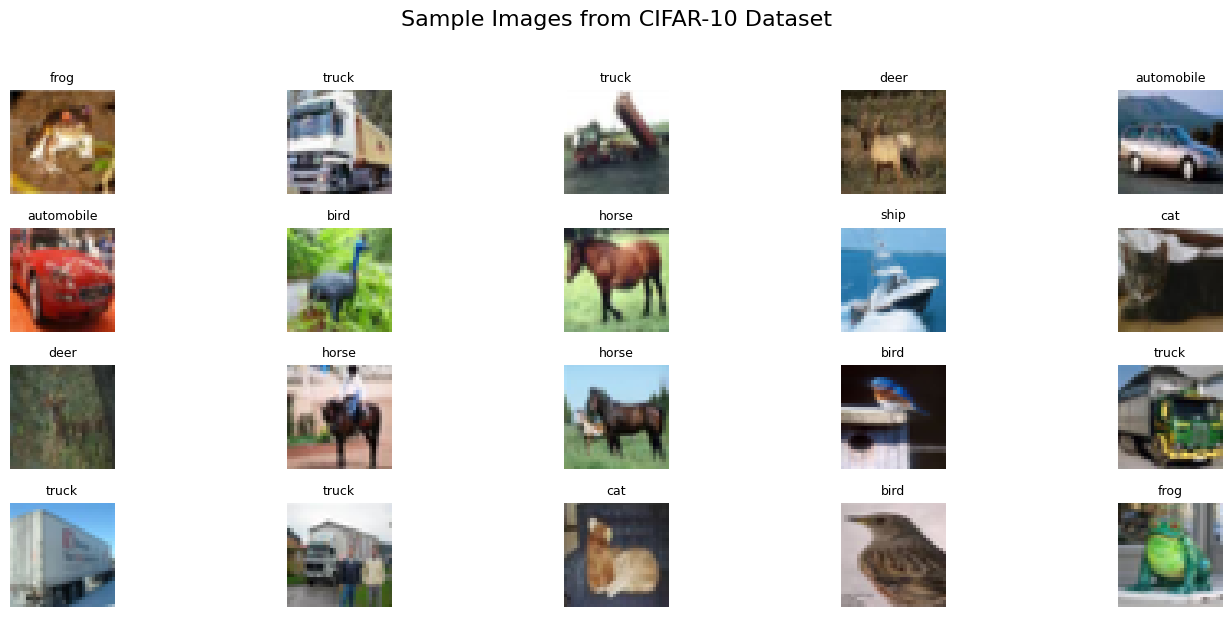

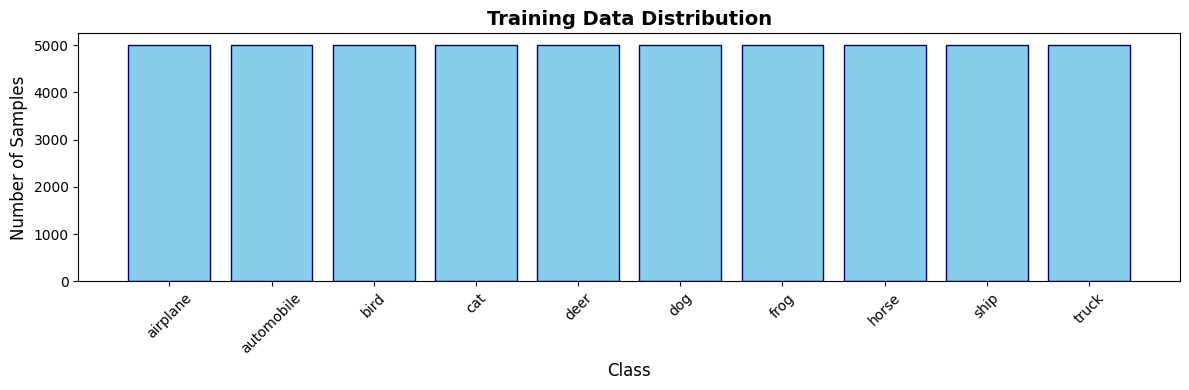

In [2]:
print("\n Loading CIFAR-10 Dataset...")
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"\n Dataset Information:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]}")
print(f"Number of classes: {len(class_names)}")

# Visualize sample images
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=9)
    plt.axis('off')
plt.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Class distribution
plt.figure(figsize=(12, 4))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar([class_names[i] for i in unique], counts, color='skyblue', edgecolor='navy')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Training Data Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
print("\n Preprocessing Data...")

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train_cat.shape}")


 Preprocessing Data...
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)



 Building Convolutional Neural Network...

 Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 849,066 (3.24 MB)

 Trainable params: 847,402 (3.23 MB)

 Non-trainable params: 1,664 (6.50 KB)

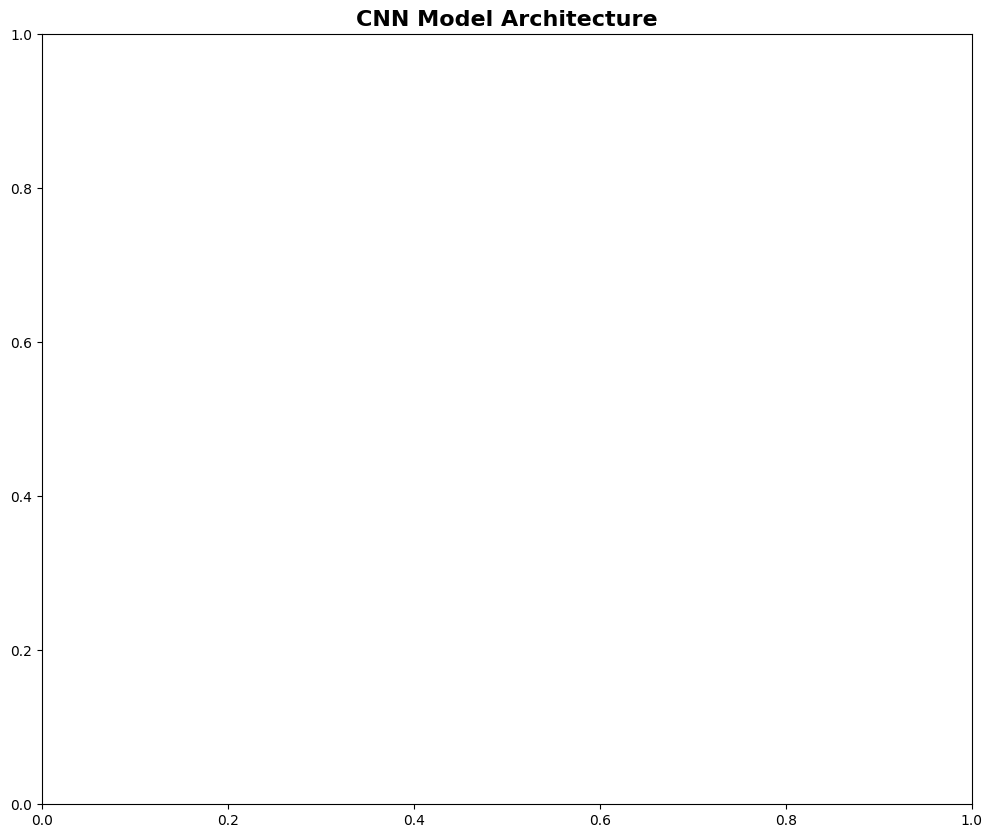

In [4]:
print("\n Building Convolutional Neural Network...")

model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
print("\n Model Architecture:")
model.summary()

# Visualize model architecture
plt.figure(figsize=(12, 10))
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,
                       rankdir='TB', dpi=100)
plt.title('CNN Model Architecture', fontsize=16, fontweight='bold')
plt.show()


In [5]:
print("\n Training Model...")

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    batch_size=128,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\n Training Complete!")


 Training Model...
Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.2682 - loss: 2.4223 - val_accuracy: 0.1611 - val_loss: 3.5874 - learning_rate: 0.0010
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4848 - loss: 1.4086 - val_accuracy: 0.5627 - val_loss: 1.2050 - learning_rate: 0.0010
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5857 - loss: 1.1634 - val_accuracy: 0.6409 - val_loss: 1.0318 - learning_rate: 0.0010
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6476 - loss: 1.0001 - val_accuracy: 0.6861 - val_loss: 0.8965 - learning_rate: 0.0010
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6916 - loss: 0.8798 - val_accuracy: 0.6716 - val_loss: 0.9309 - learning_rate: 0.0010
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7252 - loss: 0.7932 - val_accuracy: 0.7577 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accura


 Visualizing Training History...


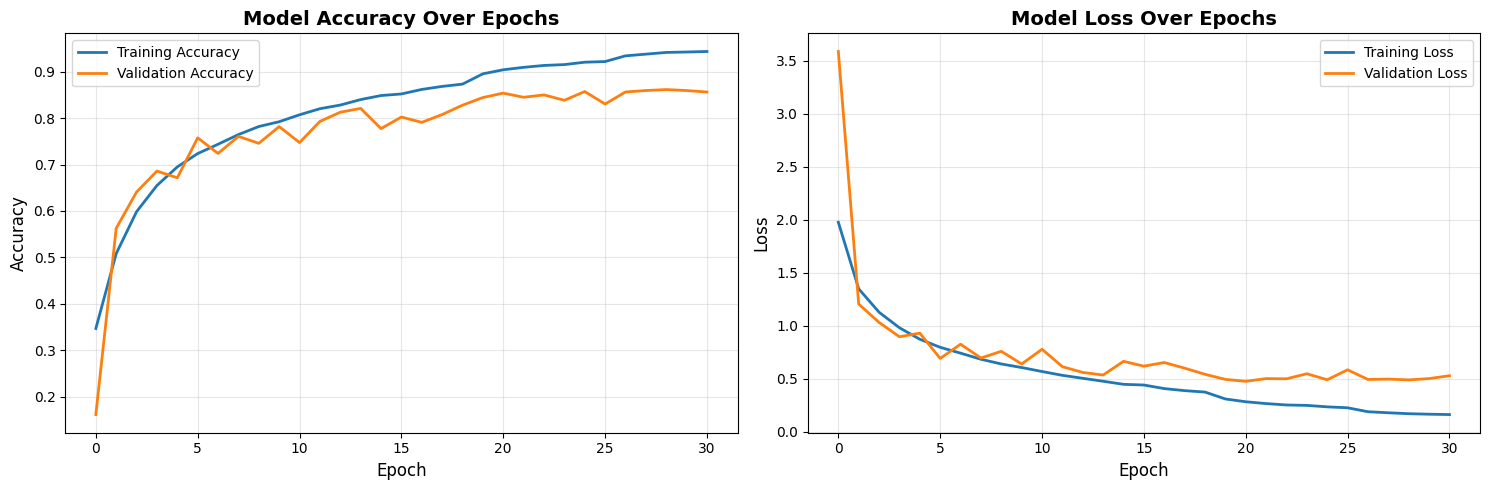

In [6]:
print("\n Visualizing Training History...")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
print("\n Evaluating Model on Test Data...")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n Test Accuracy: {test_accuracy*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# Make predictions
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test.flatten()



 Evaluating Model on Test Data...

 Test Accuracy: 84.58%
 Test Loss: 0.5026



🔍 Generating Confusion Matrix...


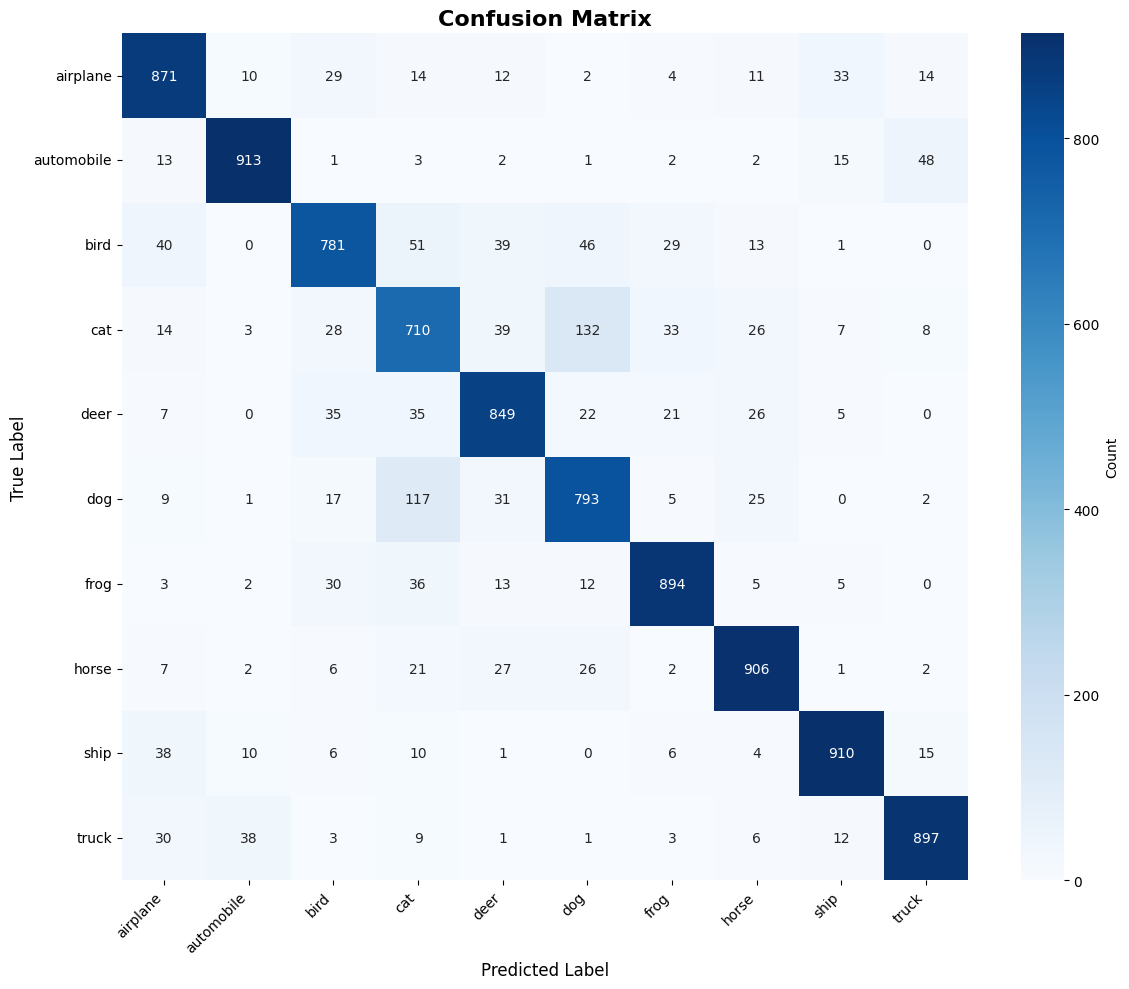

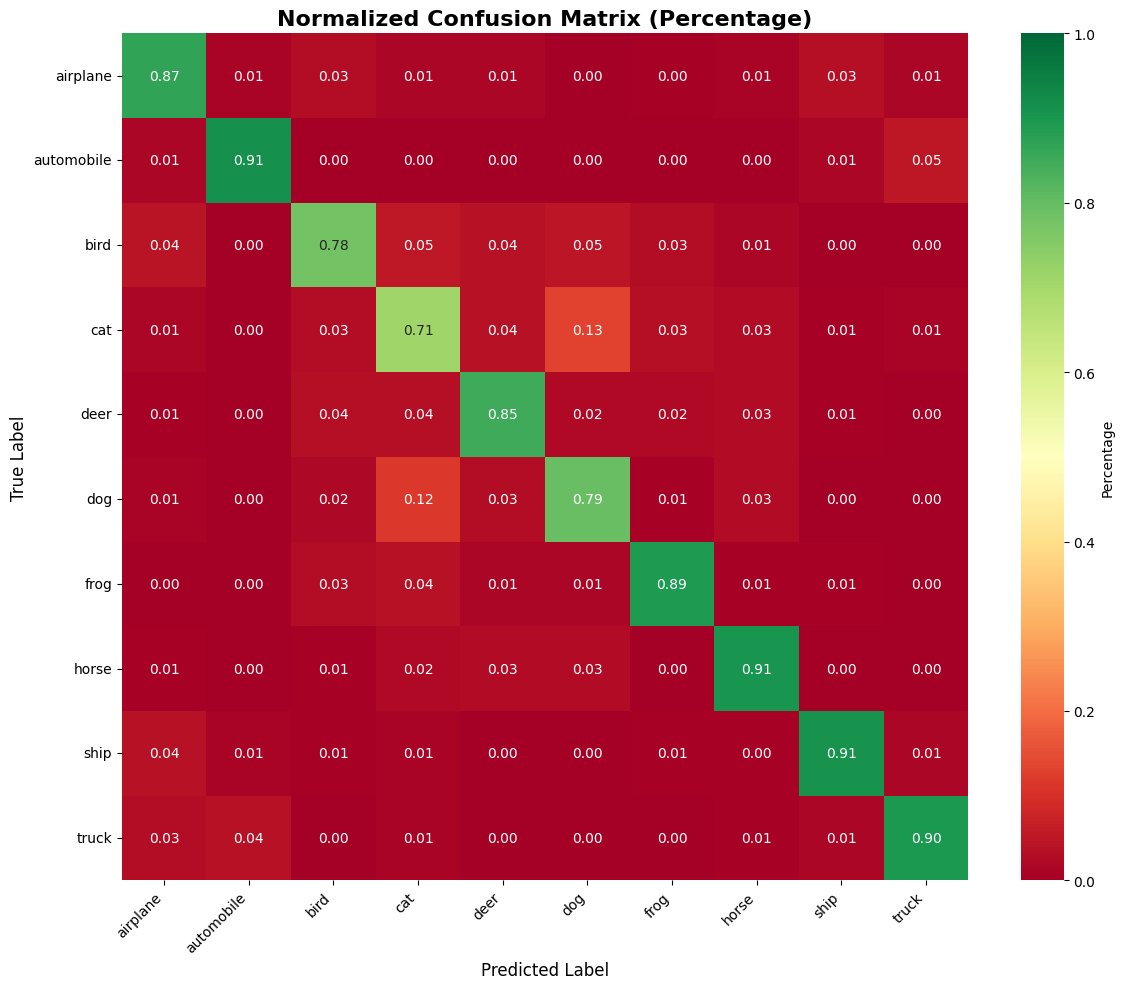

In [ ]:
print("\n Generating Confusion Matrix...")

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='RdYlGn',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage'}, vmin=0, vmax=1)
plt.title('Normalized Confusion Matrix (Percentage)', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


 Classification Report:

              precision    recall  f1-score   support

    airplane     0.8680    0.8480    0.8579      1000
  automobile     0.9056    0.9500    0.9273      1000
        bird     0.8177    0.7400    0.7769      1000
         cat     0.7408    0.6860    0.7124      1000
        deer     0.8139    0.8530    0.8330      1000
         dog     0.7389    0.7980    0.7673      1000
        frog     0.8585    0.9100    0.8835      1000
       horse     0.8702    0.8780    0.8741      1000
        ship     0.9090    0.9190    0.9140      1000
       truck     0.9369    0.8760    0.9054      1000

    accuracy                         0.8458     10000
   macro avg     0.8459    0.8458    0.8452     10000
weighted avg     0.8459    0.8458    0.8452     10000



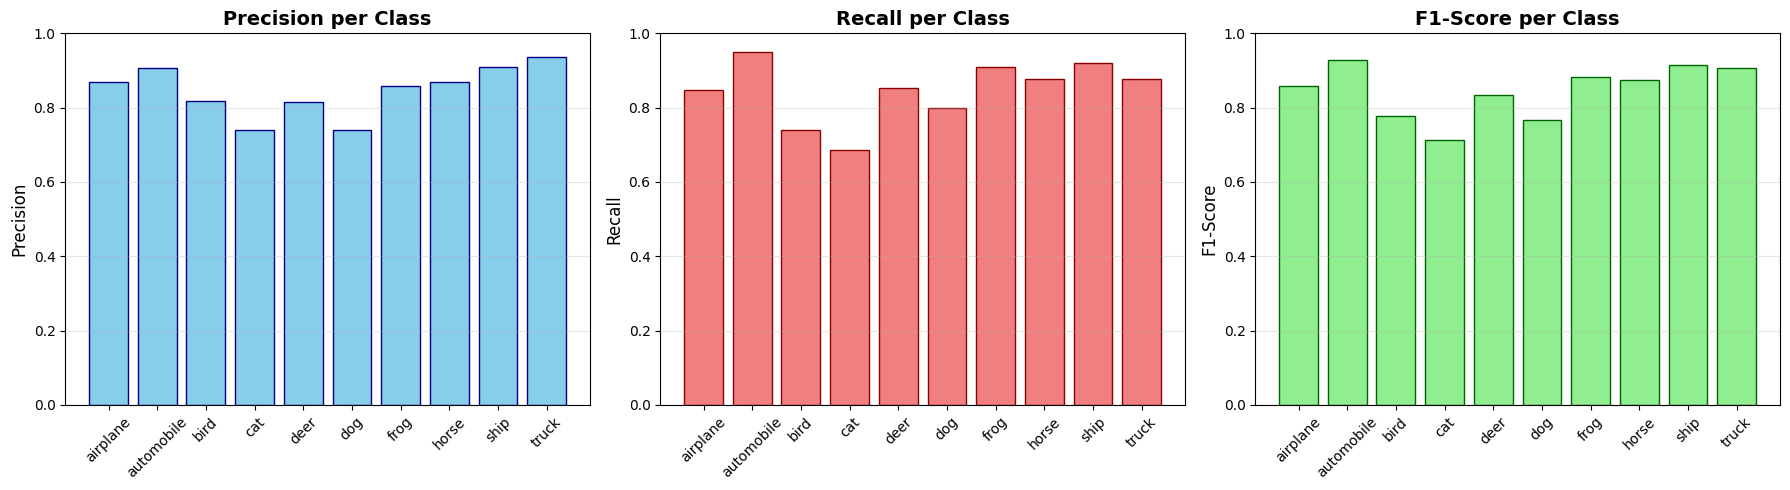

In [8]:
print("\n Classification Report:")
print("\n" + classification_report(y_true_classes, y_pred_classes,
                                   target_names=class_names, digits=4))

# Visualize per-class metrics
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(
    y_true_classes, y_pred_classes, average=None
)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Precision
axes[0].bar(class_names, precision, color='skyblue', edgecolor='navy')
axes[0].set_title('Precision per Class', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Precision', fontsize=12)
axes[0].set_ylim([0, 1])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Recall
axes[1].bar(class_names, recall, color='lightcoral', edgecolor='darkred')
axes[1].set_title('Recall per Class', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Recall', fontsize=12)
axes[1].set_ylim([0, 1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# F1-Score
axes[2].bar(class_names, f1, color='lightgreen', edgecolor='darkgreen')
axes[2].set_title('F1-Score per Class', fontsize=14, fontweight='bold')
axes[2].set_ylabel('F1-Score', fontsize=12)
axes[2].set_ylim([0, 1])
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


 Visualizing Sample Predictions...


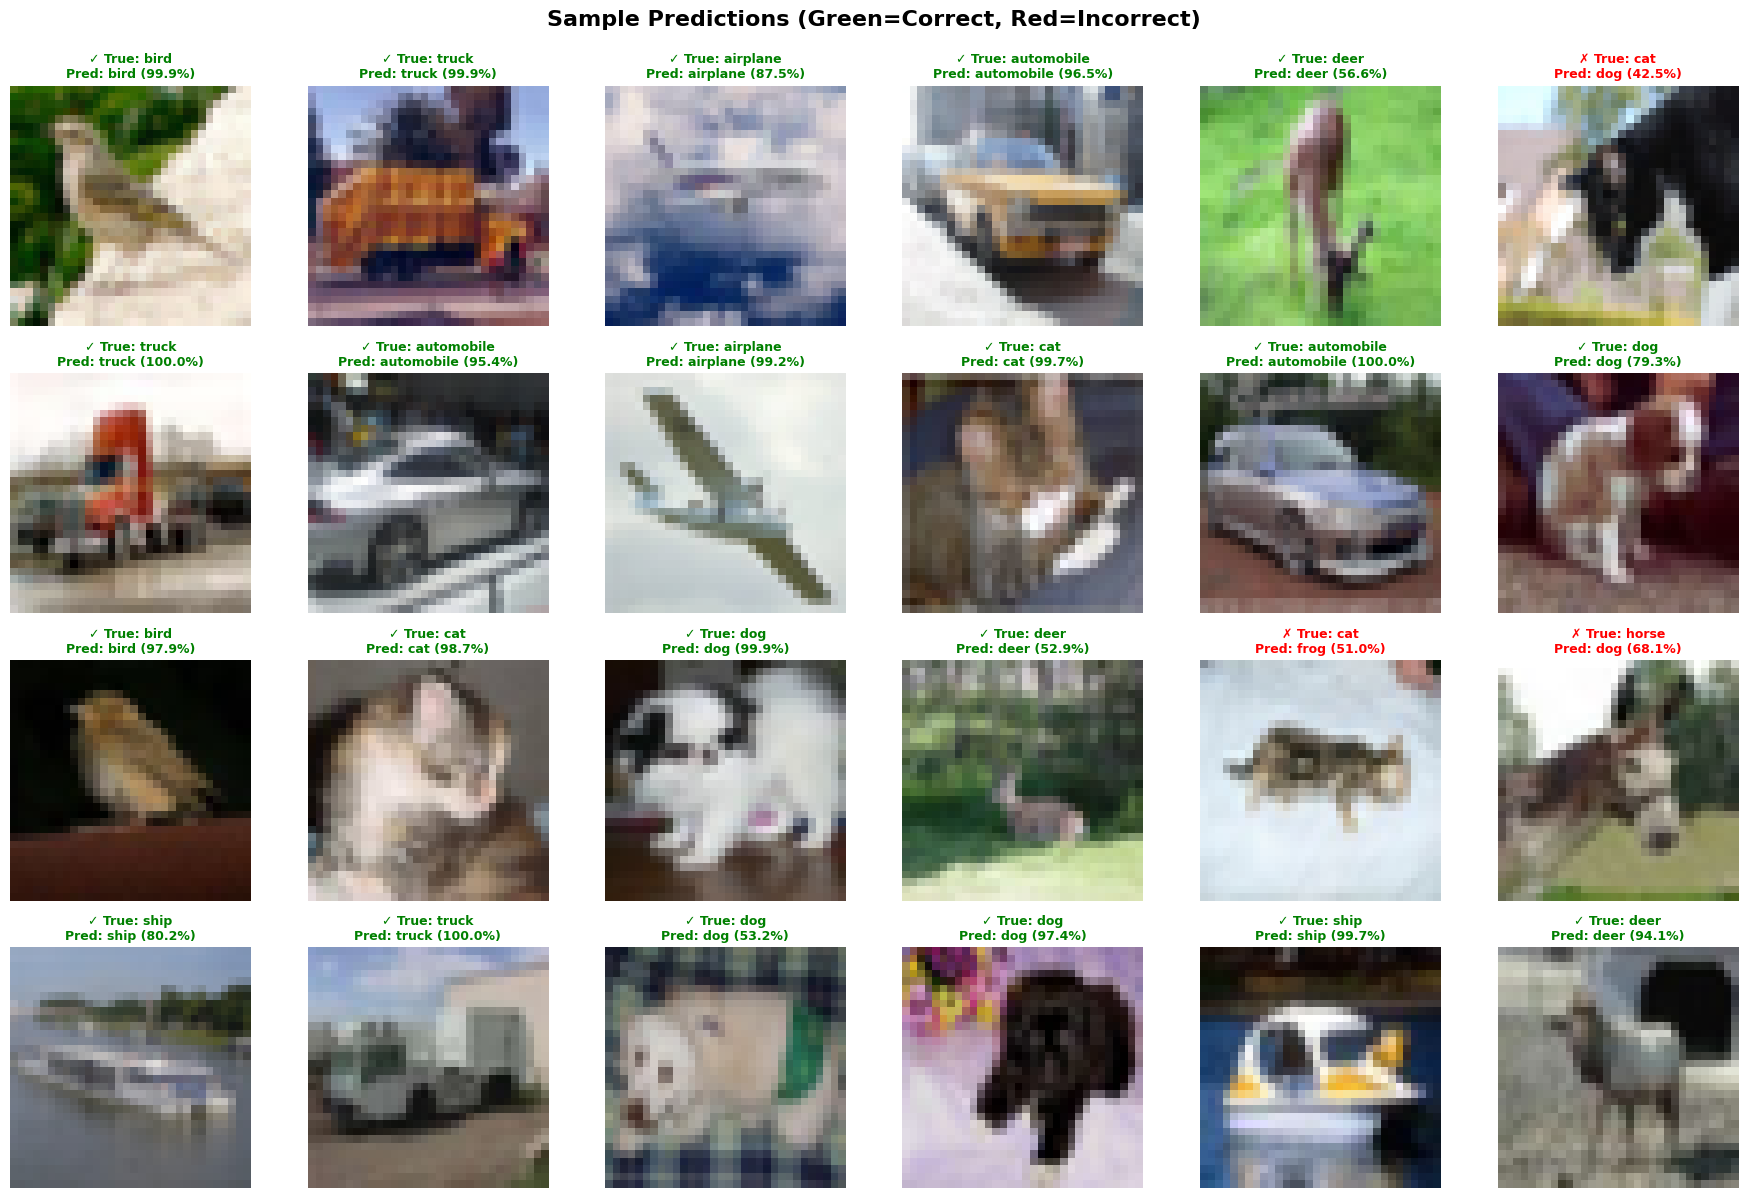

In [9]:
print("\n Visualizing Sample Predictions...")

# Get random samples
sample_indices = np.random.choice(len(X_test), 24, replace=False)

fig, axes = plt.subplots(4, 6, figsize=(18, 12))
axes = axes.flatten()

for idx, sample_idx in enumerate(sample_indices):
    ax = axes[idx]

    # Get prediction
    true_label = y_true_classes[sample_idx]
    pred_label = y_pred_classes[sample_idx]
    confidence = y_pred[sample_idx][pred_label] * 100

    # Display image
    ax.imshow(X_test[sample_idx])

    # Set title with color coding
    if true_label == pred_label:
        color = 'green'
        symbol = '✓'
    else:
        color = 'red'
        symbol = '✗'

    ax.set_title(f'{symbol} True: {class_names[true_label]}\n'
                 f'Pred: {class_names[pred_label]} ({confidence:.1f}%)',
                 fontsize=9, color=color, fontweight='bold')
    ax.axis('off')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


 Analyzing Misclassifications...
Total misclassified samples: 1542 out of 10000
Misclassification rate: 15.42%


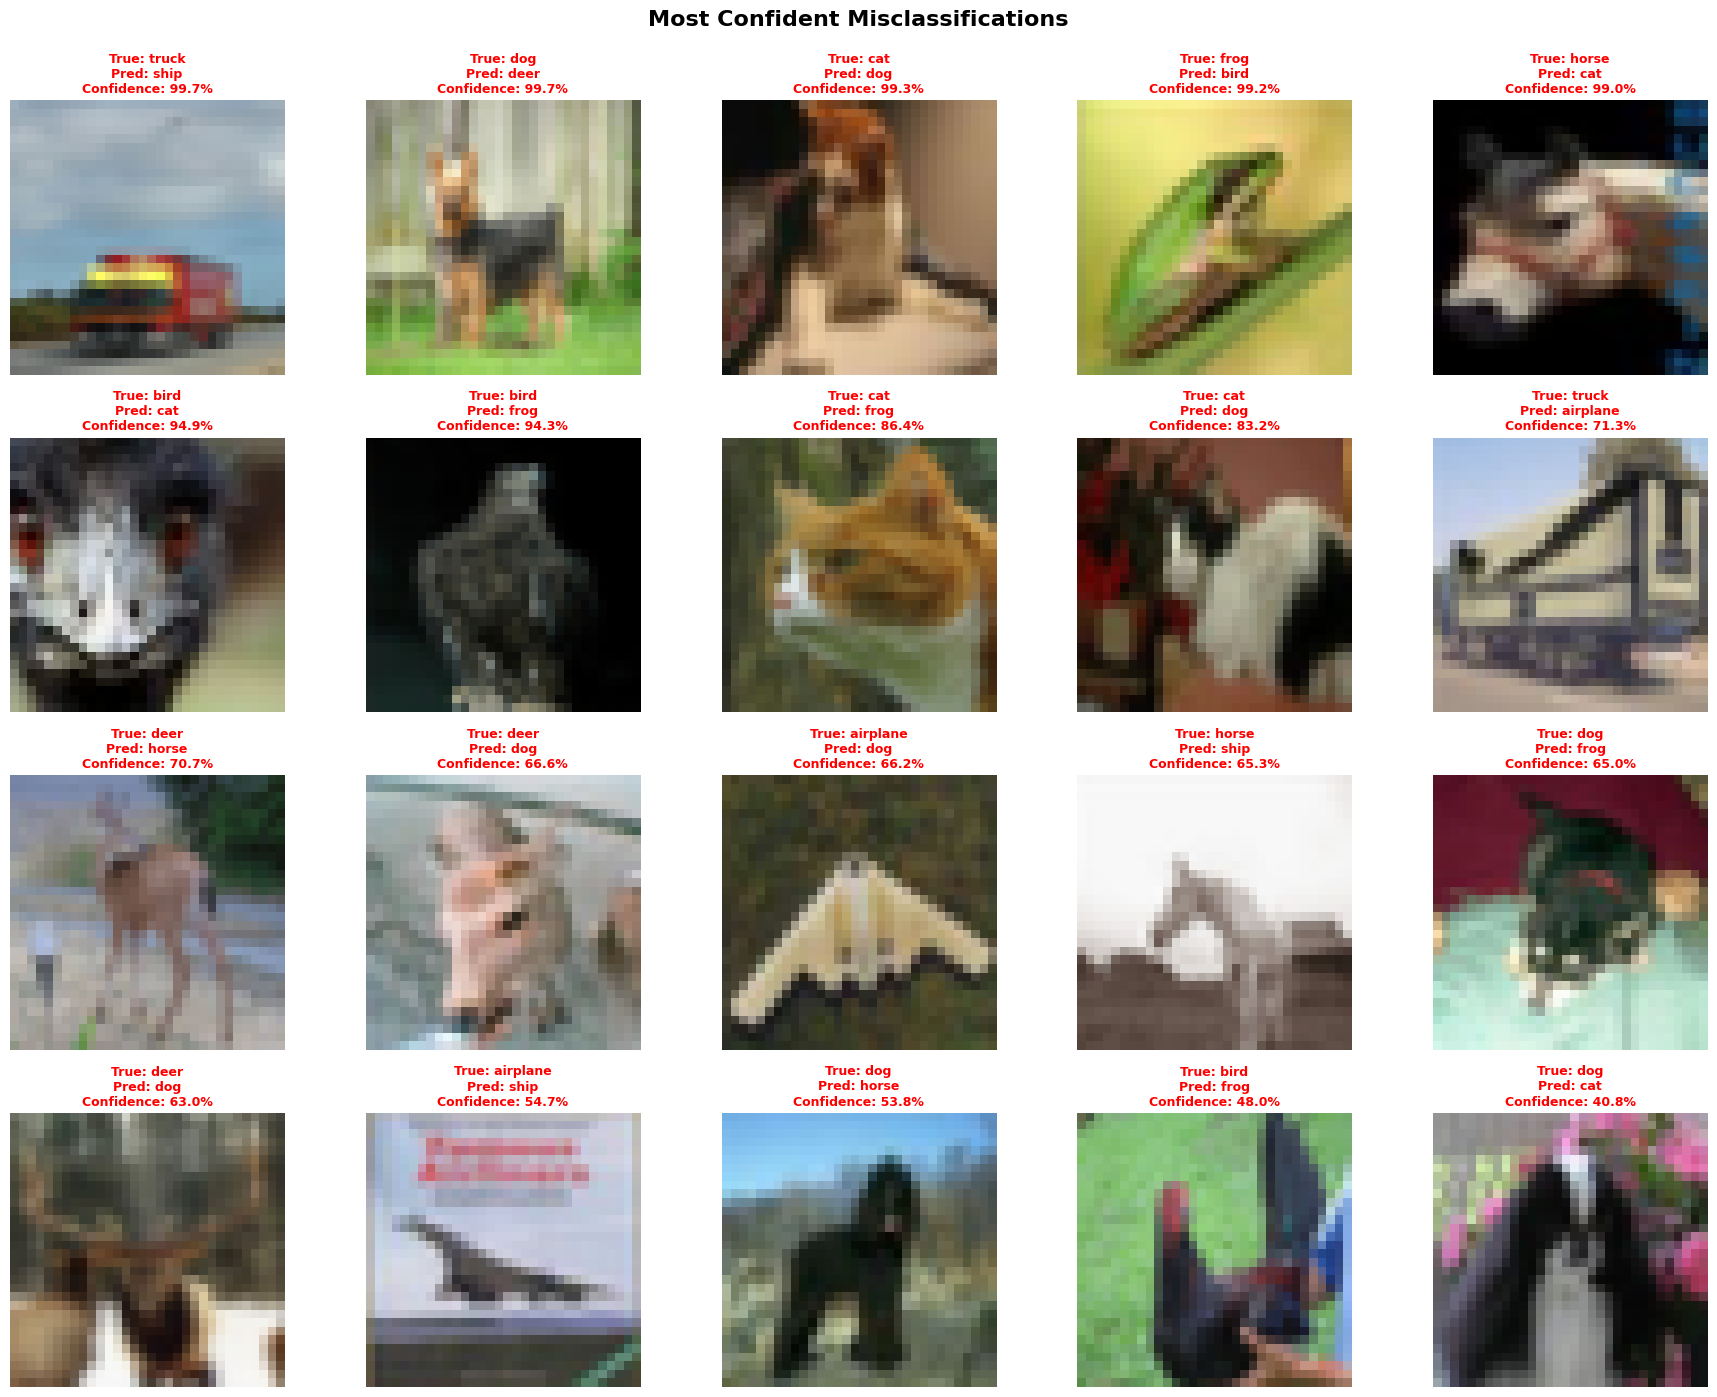

In [10]:
print("\n Analyzing Misclassifications...")

# Find misclassified samples
misclassified_idx = np.where(y_pred_classes != y_true_classes)[0]
print(f"Total misclassified samples: {len(misclassified_idx)} out of {len(y_test)}")
print(f"Misclassification rate: {len(misclassified_idx)/len(y_test)*100:.2f}%")

# Show worst predictions
if len(misclassified_idx) > 0:
    # Get confidence of wrong predictions
    worst_predictions = []
    for idx in misclassified_idx[:20]:
        pred_conf = y_pred[idx][y_pred_classes[idx]]
        worst_predictions.append((idx, pred_conf))

    # Sort by confidence (most confident wrong predictions)
    worst_predictions.sort(key=lambda x: x[1], reverse=True)

    fig, axes = plt.subplots(4, 5, figsize=(18, 14))
    axes = axes.flatten()

    for i, (idx, conf) in enumerate(worst_predictions[:20]):
        ax = axes[i]

        true_label = y_true_classes[idx]
        pred_label = y_pred_classes[idx]

        ax.imshow(X_test[idx])
        ax.set_title(f'True: {class_names[true_label]}\n'
                     f'Pred: {class_names[pred_label]}\n'
                     f'Confidence: {conf*100:.1f}%',
                     fontsize=9, color='red', fontweight='bold')
        ax.axis('off')

    plt.suptitle('Most Confident Misclassifications',
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

In [11]:
print("\n Saving Model...")

# Save the model
model.save('cifar10_cnn_model.h5')
print(" Model saved as 'cifar10_cnn_model.h5'")

# Save model architecture as JSON
model_json = model.to_json()
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model_json)
print(" Model architecture saved as 'model_architecture.json'")

# Save weights separately
model.save_weights('model_weights.weights.h5')
print(" Model weights saved as 'model_weights.weights.h5'")

print("\n Complete! Your deep learning model is ready for deployment.")


 Saving Model...
 Model saved as 'cifar10_cnn_model.h5'
 Model architecture saved as 'model_architecture.json'
 Model weights saved as 'model_weights.weights.h5'

 Complete! Your deep learning model is ready for deployment.
